## Project description

You work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (eg Xbox or PlayStation), and historical data on game sales are available from open sources. You need to identify patterns that determine whether a game succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns.

In front of you is data going back to 2016. Let's imagine that it's December 2016 and you're planning a campaign for 2017.
(The important thing is to get experience working with data. It doesn't really matter whether you're forecasting 2017 sales based on data from 2016 or 2017 sales based on data from 2016.)

The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature.

## Data description

— Name 

— Platform 

— Year_of_Release 

— Genre 

— NA_sales (North American sales in USD million)

— EU_sales (sales in Europe in USD million)

— JP_sales (sales in Japan in USD million)

— Other_sales (sales in other countries in USD million)

— Critic_Score (maximum of 100)

— User_Score (maximum of 10)

— Rating (ESRB)

Data for 2016 may be incomplete.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats as st

In [2]:
try: 
    df=pd.read_csv('/datasets/games.csv')
except:
    df=pd.read_csv('C:\Projects\datasets\moved_games.csv')

## Prepare the data

   Let's have a look at the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
display(df)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


   The data contains information about games, platforms, years of release, genres, sales in different regions, critic and user scores and rating. 11 columns and 16715 rows.
   We can see some problems in our data: 
- upper cased column names,
- inappropriate data type in columns 'Year_of_Release' and 'User_Score '. 
- missing values in columns 'Name', 'Genre', Critic_Score', 'User_Score', 'Rating'.

Let's deal with them step by step. First of all we'll change columns name to lowercase

In [5]:
df.columns= df.columns.str.lower()

In [6]:
display(df)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Our next step is to solve the problem with missing values. We can see that there are 2 missing values in columns 'Name' and 'Genre'. Our assumption is that it is the same clients and it is confirmed by test. As we see, there are a lot of missing values in both rows, there is no information about names of the games, genres or scores. Besides, these games are very old, the information about them is not useful for our goals. So we decided to drop these rows.

In [7]:
display(df.loc[(df['name'].isna() & df['genre'].isna())])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [8]:
df=df.dropna(subset=['name'])

In [9]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Our next goal is to fix missing values in column 'year_of_release'. There are 269 games without information about the year of release. We think that years were missed by accident and we can replace Nan values by the most frequent year values of each game.It turns out that it is not a very easy task. There are some games with no year of release at all. So we decide to replace missing values at least where we can. After our manipulations we have 146 missing values. We leave them as they are.

In [10]:
display(df.loc[(df['year_of_release'].isna())])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [11]:
df_withoutNan=df[df['year_of_release'].notnull()]

In [12]:
year_dict=df_withoutNan.groupby('name')['year_of_release'].apply(lambda x:x.value_counts().idxmax()).to_dict()

In [13]:
df.loc[[475],['year_of_release']] = 2005

In [14]:
df['year_of_release']=df.apply(lambda x:year_dict.get(x['name']) if np.isnan(x['year_of_release']) else x['year_of_release'], axis=1)

In [15]:
display(df.loc[(df['year_of_release'].isna())])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T
1142,Rock Band,PS3,NaN,Misc,0.99,0.41,0.00,0.22,92.0,8.4,T
1301,Triple Play 99,PS,NaN,Sports,0.81,0.55,0.00,0.10,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16277,Homeworld Remastered Collection,PC,NaN,Strategy,0.00,0.01,0.00,0.00,86.0,8.2,E10+
16288,Shorts,DS,NaN,Platform,0.01,0.00,0.00,0.00,NaN,tbd,E10+
16348,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


We have a lot of missing values in columns 'Critic_Score', 'User_Score', 'Rating'. In our opinion, we shouldn't replace them by any values, it can damage our data. We'll change Nan values in column 'Rating' with 'Unknow'.

In [16]:
df['rating']=df['rating'].fillna('unknown')

Also we will chang datatype of 'user_score' column to float

In [17]:
df['user_score']=pd.to_numeric(df['user_score'], errors = 'coerce')

In [18]:
df['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

Now we'd like to calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.

In [19]:
df['total_sales']=df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']

In [20]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,unknown,0.01


Now our data looks fine and is ready for future analysis.

## Analyze the data

  The biggest amount of games were released between 2002 and 2011. But in our opinion, the most significant period of time for our goal is the last 4 years, the period from 2012-2016, because we need the most fresh data. 

In [21]:
data=df[['year_of_release','name']].groupby(['year_of_release'])['name'].nunique().reset_index()
data

,year_of_release,name
0,1980.0,9
1,1981.0,46
2,1982.0,36
3,1983.0,17
4,1984.0,14
5,1985.0,14
6,1986.0,21
7,1987.0,16
8,1988.0,15
9,1989.0,17


The platforms with the greatest total sales are PS2, X360 and PS3. The top leader platform has an interesting fate, it appeared in 2000 and became quite popular from the start but after 2006 sales began declining till 2011, when platform died. PS2, X360 
appeared in 2005, were on the top of sales in 2010-2011, now their sales are gradually decreasing, but platforms still exist. 

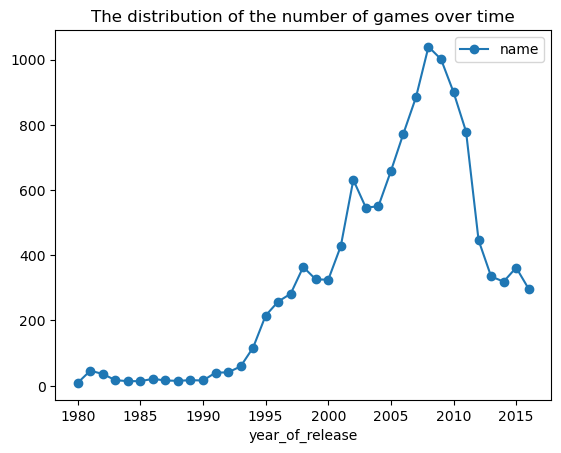

In [22]:
data.plot(x='year_of_release', y='name', style='o-', title ='The distribution of the number of games over time');

In [23]:
df1=df[['platform','total_sales']].groupby(['platform']).sum().sort_values(by='total_sales', ascending=False).reset_index()
df1

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


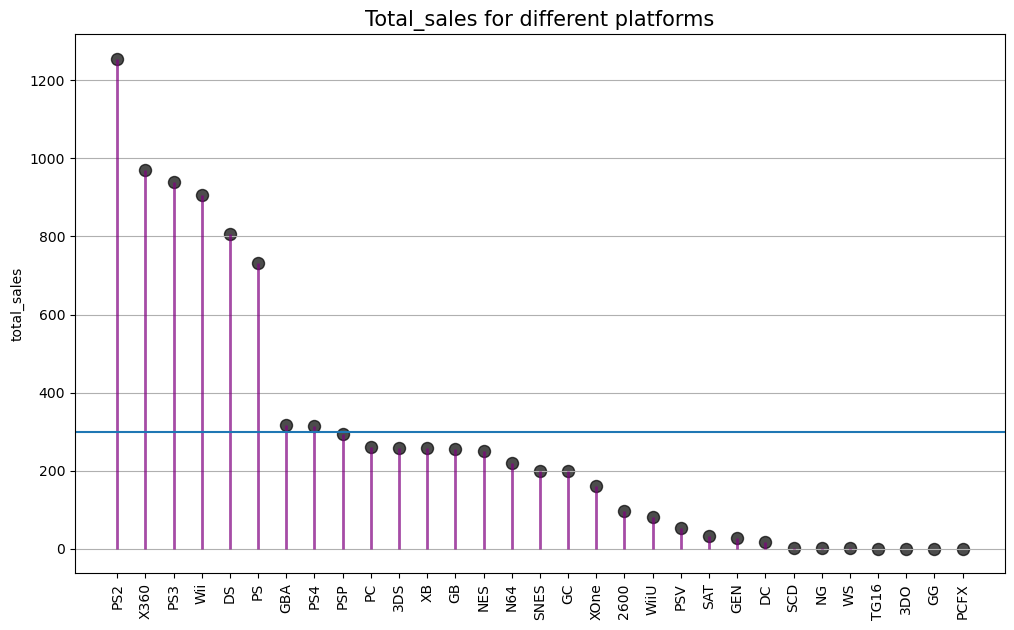

In [24]:
fig,ax=plt.subplots(figsize=(12,7))
ax.grid(axis='y')
ax.vlines(x=df1.platform, ymin=0, ymax=df1.total_sales, color='purple', alpha=0.7, linewidth=2)
ax.scatter(x=df1.platform,y=df1.total_sales, s=75, color='black',alpha=0.7)

ax.set_title("Total_sales for different platforms", fontdict={'size':15})
ax.set_ylabel('total_sales')
ax.set_xticks(df1.platform)
ax.set_xticklabels(df1.platform,rotation=90)
ax.axhline(y=300)
plt.show()

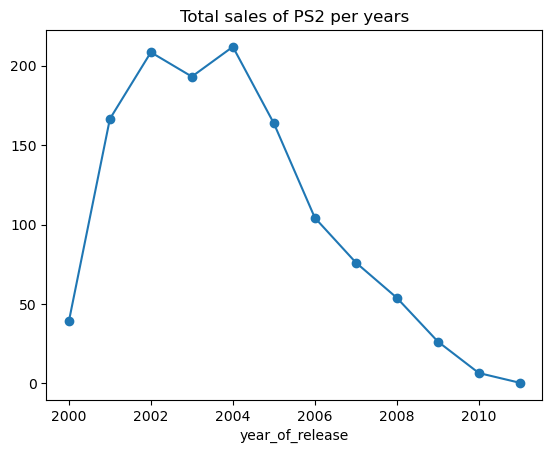

In [25]:
df.query('platform == "PS2"').groupby('year_of_release')['total_sales'].sum().plot(style='o-', title ='Total sales of PS2 per years');


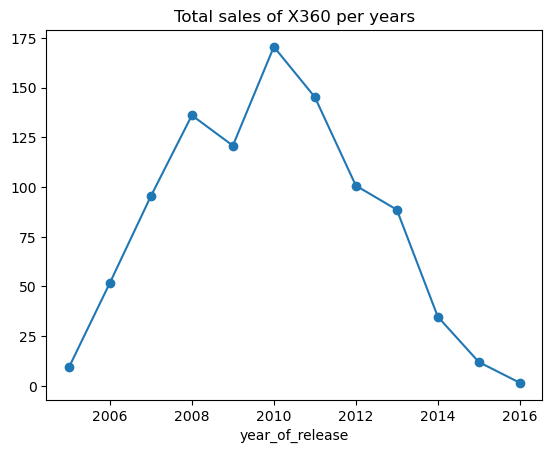

In [26]:
df.query('platform == "X360"').groupby('year_of_release')['total_sales'].sum().plot(style='o-', title ='Total sales of X360 per years');

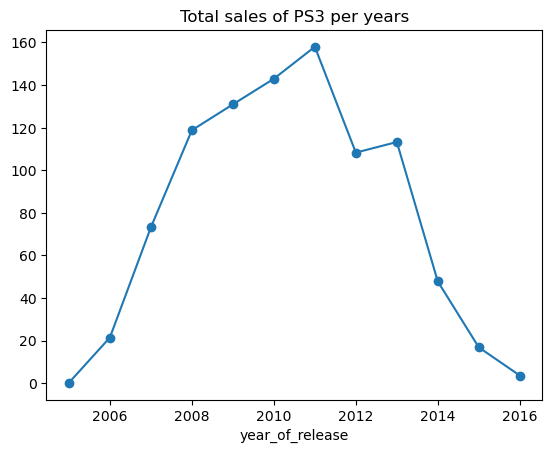

In [27]:
df.query('platform == "PS3"').groupby('year_of_release')['total_sales'].sum().plot(style='o-', title ='Total sales of PS3 per years');

  Our next goal is to find platforms that used to be popular but now have zero sales and find how long does it generally take for new platforms to appear and old ones to fade. First of all we are going to filter platforms released after 2000. They are more interesting for us than the old ones. Then we'll find minimum and maximum values of year of release and we will see a lot of platforms that used to be popular but now don't produce games (WS,XB,PS,N64,PS2,GBA,GB,DC,GC,DS,PSP). When we'll have minimum and maximum values we can calculate average value. So let's go.

In [28]:
df_latest=df[df.year_of_release>=2000]
df_latest

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,unknown,0.01


In [29]:
df_latest_age=df_latest.groupby(['platform'])['year_of_release'].agg(['min','max'])
df_latest_age

,min,max
platform,,
3DS,2000.0,2016.0
DC,2000.0,2008.0
DS,2004.0,2013.0
GB,2000.0,2001.0
GBA,2000.0,2007.0
GC,2001.0,2007.0
N64,2000.0,2004.0
PC,2000.0,2016.0
PS,2000.0,2003.0


In [30]:
df_latest_age['age']=df_latest_age['max']-df_latest_age['min']
df_latest_age

,min,max,age
platform,,,
3DS,2000.0,2016.0,16.0
DC,2000.0,2008.0,8.0
DS,2004.0,2013.0,9.0
GB,2000.0,2001.0,1.0
GBA,2000.0,2007.0,7.0
GC,2001.0,2007.0,6.0
N64,2000.0,2004.0,4.0
PC,2000.0,2016.0,16.0
PS,2000.0,2003.0,3.0


In [31]:
df_latest_age['age'].median()

7.5

So the average life cycle of the game is 7,5 years.

In [32]:
df_latest_age=df_latest_age.reset_index()
df_latest_age.sort_values(by='min')

,platform,min,max,age
0,3DS,2000.0,2016.0,16.0
14,WS,2000.0,2001.0,1.0
18,XB,2000.0,2008.0,8.0
8,PS,2000.0,2003.0,3.0
7,PC,2000.0,2016.0,16.0
6,N64,2000.0,2004.0,4.0
9,PS2,2000.0,2011.0,11.0
4,GBA,2000.0,2007.0,7.0
3,GB,2000.0,2001.0,1.0
1,DC,2000.0,2008.0,8.0


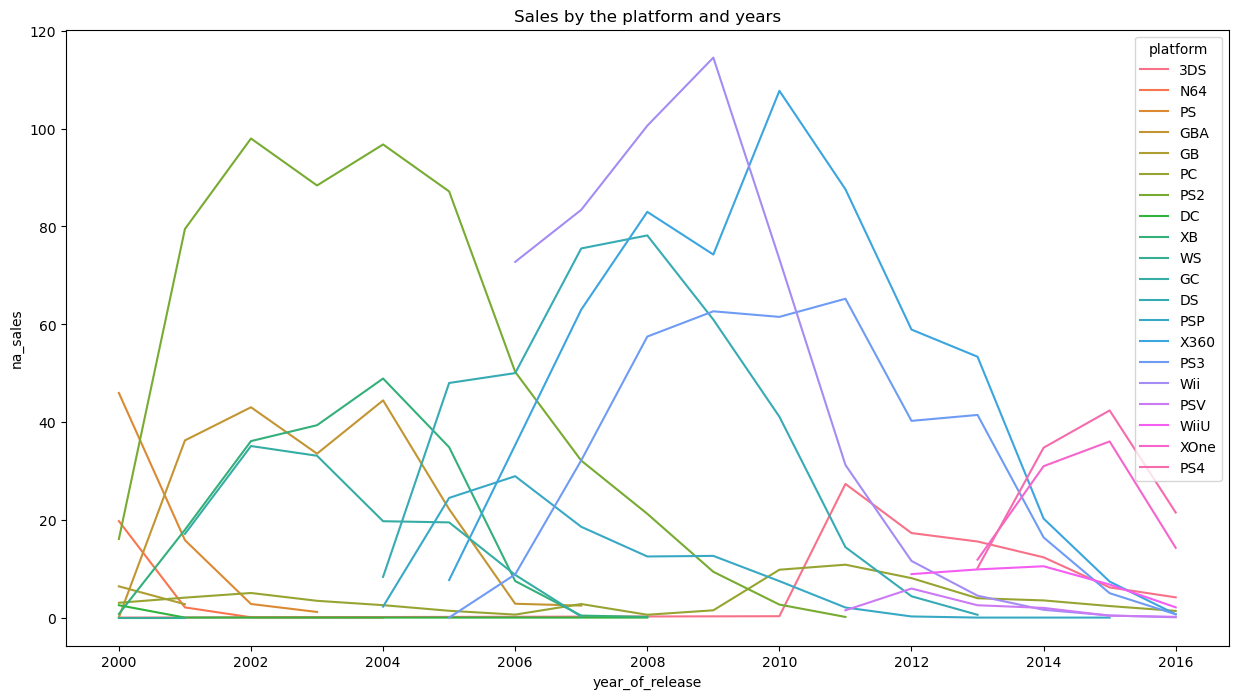

In [33]:
df_latest=df_latest.groupby(['platform','year_of_release'])['na_sales'].sum().reset_index().sort_values(by='year_of_release')
ax.set_title("Sales by the platform and years")

plt.figure(figsize=(15,8))
ax = sns.lineplot(data=df_latest, x="year_of_release", y="na_sales",hue="platform")
plt.title("Sales by the platform and years")
plt.show()

   For our prognosis we took sales information for the last 3 years, from 2013.  According to the data, the highest sales have PS4, PS3 and X360. But their sales go down, actually all platform's sales are going down. Let's look deeper.   

In [34]:
forecast_data=df[df['year_of_release']>=2013]

In [35]:
forecast_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


In [36]:
fr= forecast_data.pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum', fill_value=0)
fr

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013.0,56.57,1.54,13.01,113.25,25.99,3.38,10.59,8.59,21.65,88.58,18.96
2014.0,43.76,0.00,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015.0,27.78,0.00,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016.0,15.14,0.00,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


In [37]:
fr.shift(+1)
fr

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013.0,56.57,1.54,13.01,113.25,25.99,3.38,10.59,8.59,21.65,88.58,18.96
2014.0,43.76,0.00,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015.0,27.78,0.00,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016.0,15.14,0.00,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


In [38]:
fr-fr.shift(+1)

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014.0,-12.81,-1.54,0.27,-65.49,74.01,-3.14,1.31,-4.84,0.38,-53.84,35.11
2015.0,-15.98,0.00,-4.76,-30.94,18.90,-0.12,-5.65,-2.61,-5.68,-22.78,6.07
2016.0,-12.64,0.00,-3.27,-13.22,-49.65,-0.12,-2.00,-0.96,-11.75,-10.44,-33.99


In [39]:
dynamics=(fr-fr.shift(+1)).T
dynamics


year_of_release,2013.0,2014.0,2015.0,2016.0
platform,,,,
3DS,NaN,-12.81,-15.98,-12.64
DS,NaN,-1.54,0.00,0.00
PC,NaN,0.27,-4.76,-3.27
PS3,NaN,-65.49,-30.94,-13.22
PS4,NaN,74.01,18.90,-49.65
PSP,NaN,-3.14,-0.12,-0.12
PSV,NaN,1.31,-5.65,-2.00
Wii,NaN,-4.84,-2.61,-0.96
WiiU,NaN,0.38,-5.68,-11.75


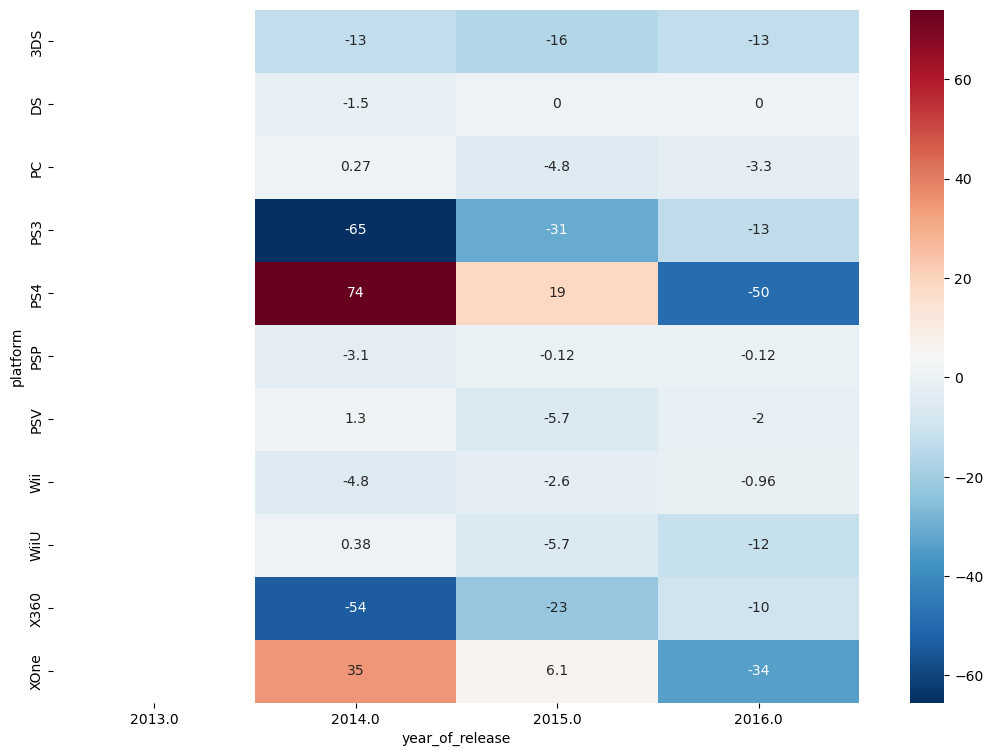

In [40]:
plt.figure(figsize=(13,9))
#sns.c(dynamics, cmap='RdBu_r', annot=True, )
sns.heatmap(dynamics, cmap='RdBu_r', annot=True);

   According to our data, PS4, PS3, X360 platforms are leading in sales during 2013-2016. However only 2 platforms are growing: PS4 and Xone. We can call them potentially profitable platforms. There are 2 platforms that are shrinking: PS3 and X360. All other platforms are more or less stable.

In [41]:
df_games=forecast_data.groupby(['platform','name'])['total_sales'].sum()

In [42]:
display(df_games)

platform  name                       
3DS        Beyblade Burst                0.03
           Fire Emblem Fates             1.67
           Frozen: Olaf's Quest          0.59
           Haikyu!! Cross Team Match!    0.04
          12-Sai. Honto no Kimochi       0.07
                                         ... 
XOne      XCOM 2                         0.04
          ZombiU                         0.01
          Zombie Army Trilogy            0.11
          Zoo Tycoon (2013)              0.36
          Zumba Fitness: World Party     0.24
Name: total_sales, Length: 2237, dtype: float64

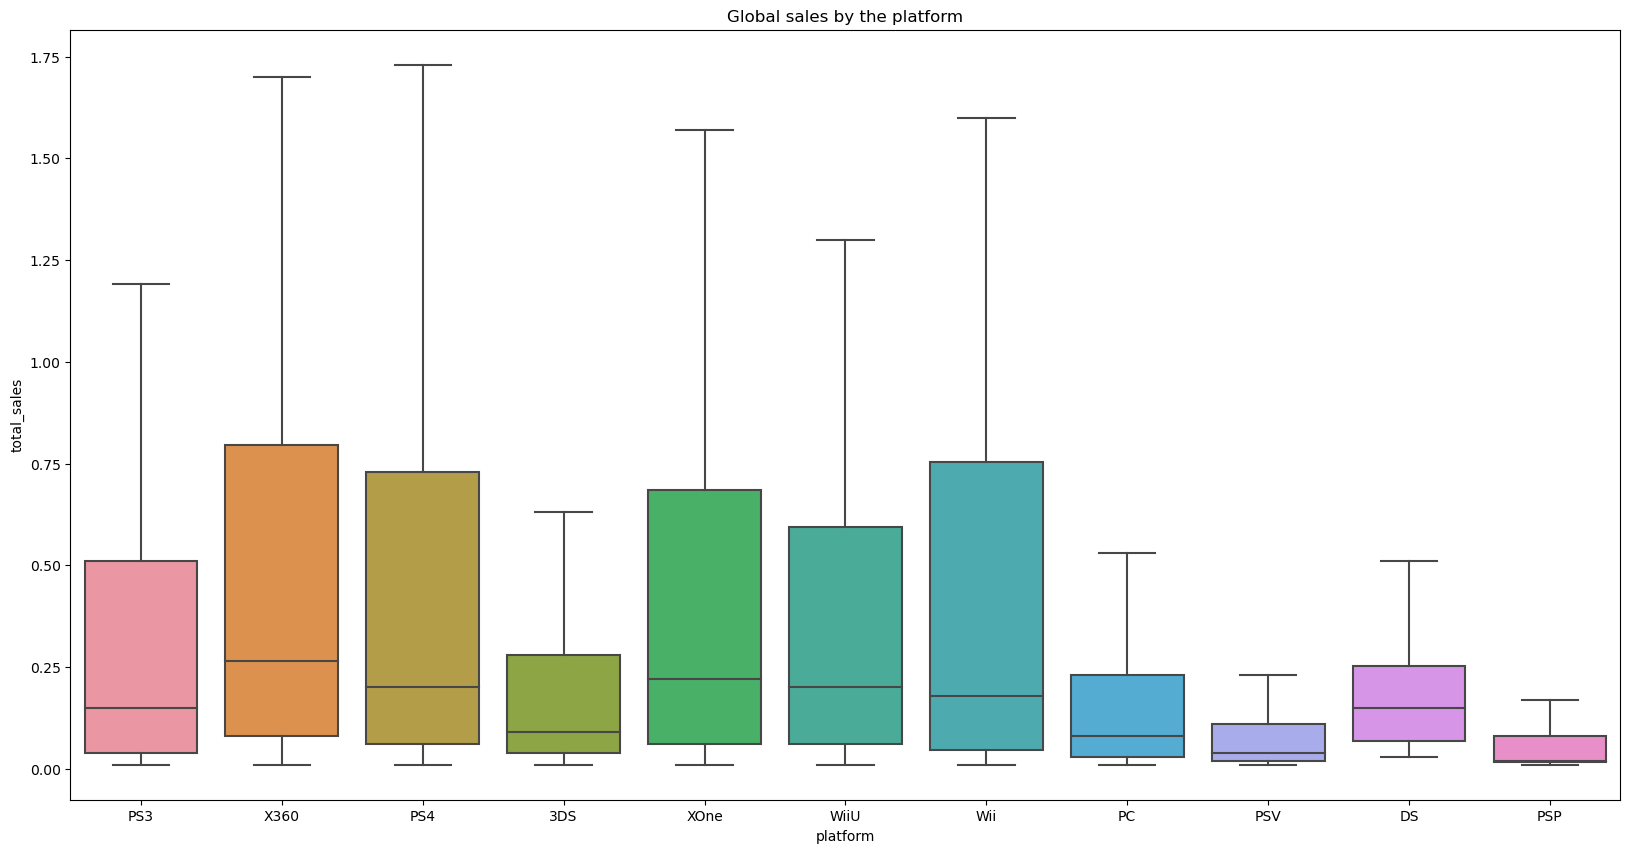

In [87]:
plt.figure(figsize=(20,10))
sns.boxplot(data=forecast_data, y="total_sales", x="platform", showfliers=False).set_title("Global sales by the platform")

plt.xlabel("platform")
plt.ylabel("total_sales");

In [44]:
order=forecast_data.groupby(['platform'])['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False)['platform'].head(10)
order

4      PS4
3      PS3
10    XOne
0      3DS
9     X360
8     WiiU
2       PC
6      PSV
7      Wii
5      PSP
Name: platform, dtype: object

Text(0.5, 1.0, 'Global sales by the top 10 platforms')

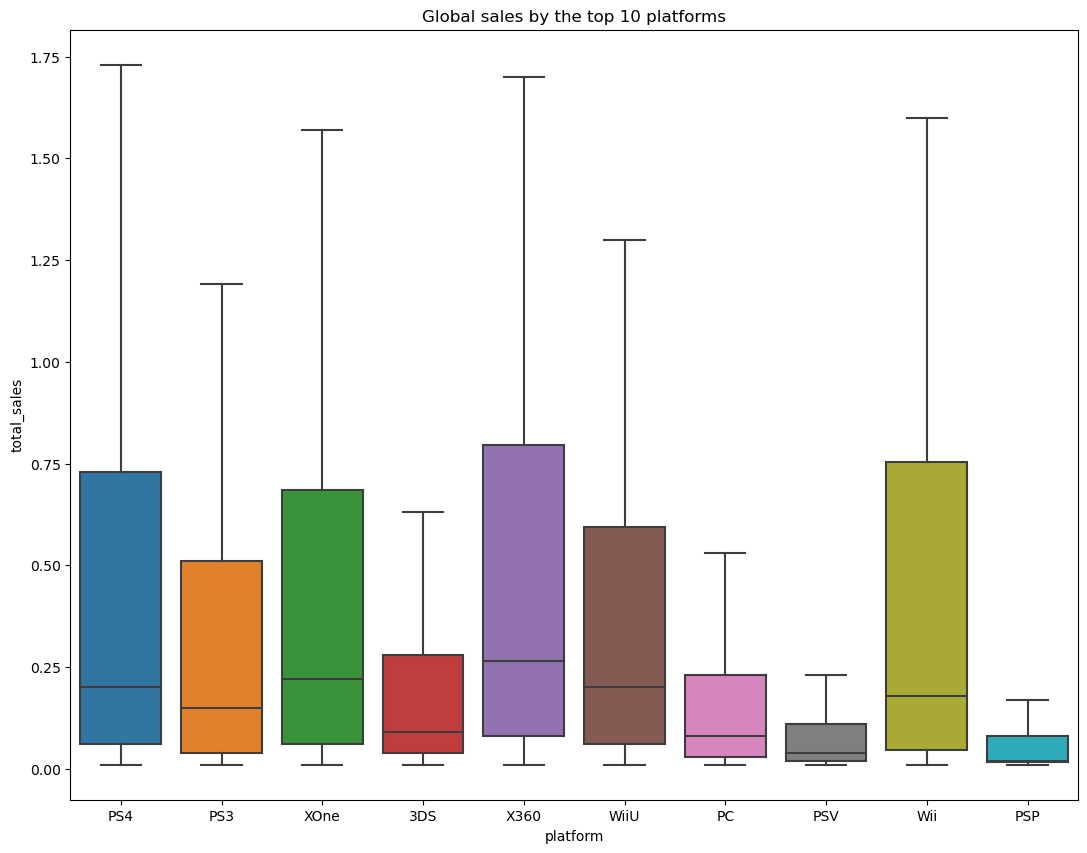

In [45]:
plt.figure(figsize=(13,10))
sns.boxplot(x='platform',y='total_sales',data=forecast_data,order=order,showfliers = False).set_title("Global sales by the top 10 platforms")


  During our analysis we build a box plot for the global sales of all games, broken down by platform. According to data, differences in sales aren't very significant. The biggest average sales has platform X360, but other platforms from the top 10 platforms are very close to each other.

In [46]:
clean_critic_scores=forecast_data[(forecast_data['critic_score'].notnull()&(df.critic_score!='tbd'))]


C:\Users\asiar\AppData\Local\Temp\ipykernel_24776\1260228106.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  clean_critic_scores=forecast_data[(forecast_data['critic_score'].notnull()&(df.critic_score!='tbd'))]


In [47]:
PS4_critic=clean_critic_scores[clean_critic_scores['platform']=='PS4']

Text(0.5, 1.0, 'The dependence sales on critic scores')

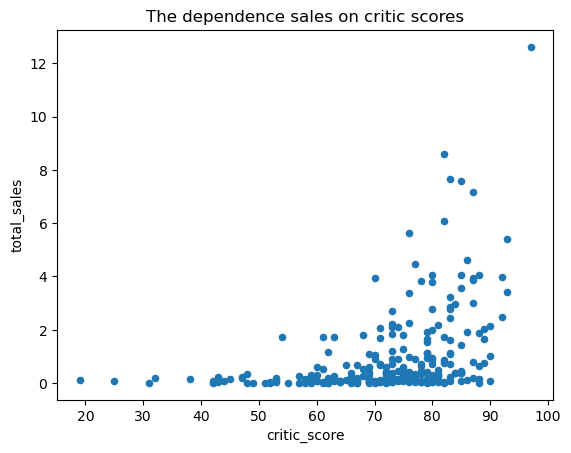

In [48]:
PS4_critic.plot(x='critic_score', y='total_sales', kind = 'scatter').set_title("The dependence sales on critic scores");


In [49]:
print(PS4_critic['critic_score'].corr(PS4_critic['total_sales']))


0.40656790206178123


In [50]:
clean_user_scores=forecast_data[forecast_data['user_score'].notnull()]

In [51]:
PS4_user=clean_user_scores[clean_user_scores['platform']=='PS4']

In [52]:
PS4_user

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
92,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,FIFA 17,PS4,2016.0,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
105,Fallout 4,PS4,2015.0,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17
...,...,...,...,...,...,...,...,...,...,...,...,...
16486,Super Dungeon Bros,PS4,2016.0,Action,0.01,0.00,0.00,0.00,42.0,2.3,E10+,0.01
16499,Sherlock Holmes: The Devil's Daughter,PS4,2016.0,Adventure,0.01,0.00,0.00,0.00,70.0,6.8,T,0.01
16500,Root Letter,PS4,2016.0,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,unknown,0.01
16526,Dungeons 2,PS4,2016.0,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.01


Text(0.5, 1.0, 'The dependence PS4 sales on user scores')

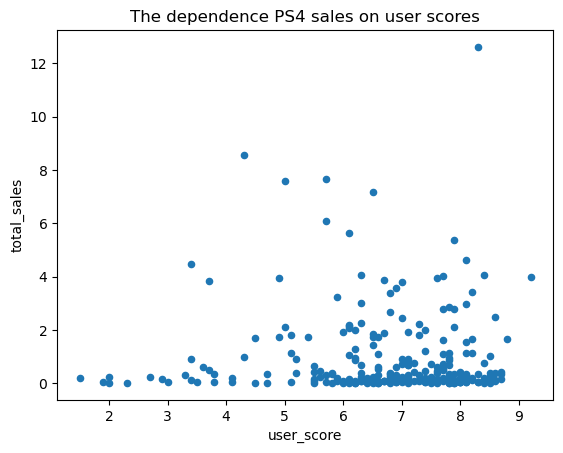

In [53]:
PS4_user.plot(x='user_score', y='total_sales', kind = 'scatter').set_title("The dependence PS4 sales on user scores");

In [54]:
print(PS4_user['user_score'].corr(PS4_user['total_sales']))



-0.03195711020455644


In [55]:
X360_critic=clean_critic_scores[clean_critic_scores['platform']=='X360']

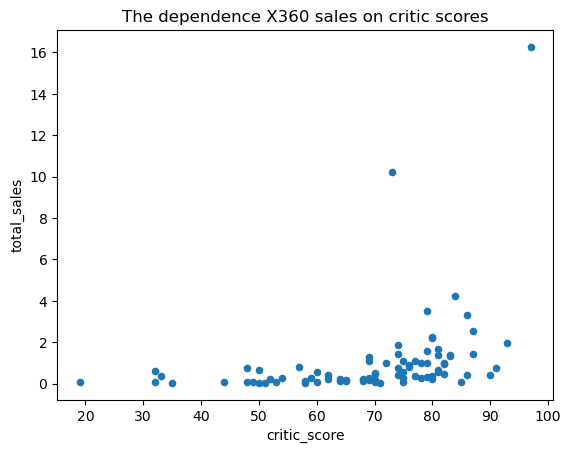

In [88]:
X360_critic.plot(x='critic_score', y='total_sales', kind = 'scatter').set_title("The dependence X360 sales on critic scores");

In [57]:
print(X360_critic['critic_score'].corr(X360_critic['total_sales']))


0.35034454602286647


In [58]:
X360_user=clean_user_scores[clean_user_scores['platform']=='X360']

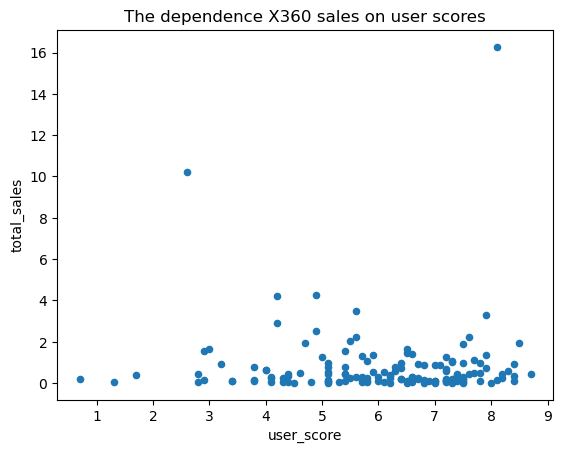

In [59]:
#Your code, but in the right place)
X360_user.plot(x='user_score', y='total_sales', kind = 'scatter').set_title("The dependence X360 sales on user scores");

In [60]:
print(X360_user['user_score'].corr(X360_user['total_sales']))


-0.011742185147181334


The biggest amount of games in our data are action (3369), sports(2348) and Misk(1750). The highest sales have action (1744), sports(1331) and shooter(1052).	Misk occupy 5th place with 802.51 total sales. The most unpopular genres with lowest sales are puzzles and strategy.

In [61]:
genre=forecast_data.groupby('genre')['name'].count().sort_values(ascending=False).reset_index()
genre

,genre,name
0,Action,769
1,Role-Playing,292
2,Adventure,245
3,Sports,214
4,Shooter,187
5,Misc,156
6,Racing,85
7,Fighting,80
8,Platform,74
9,Simulation,62


In [62]:
genre_sales=forecast_data.groupby('genre')['total_sales'].sum().sort_values(ascending=False).reset_index()
genre_sales

,genre,total_sales
0,Action,322.50
1,Shooter,232.98
2,Sports,150.65
3,Role-Playing,145.89
4,Misc,63.06
5,Platform,42.63
6,Racing,39.89
7,Fighting,35.31
8,Adventure,23.64
9,Simulation,21.76


Text(0.5, 1.0, 'Total sales broken down by genres')

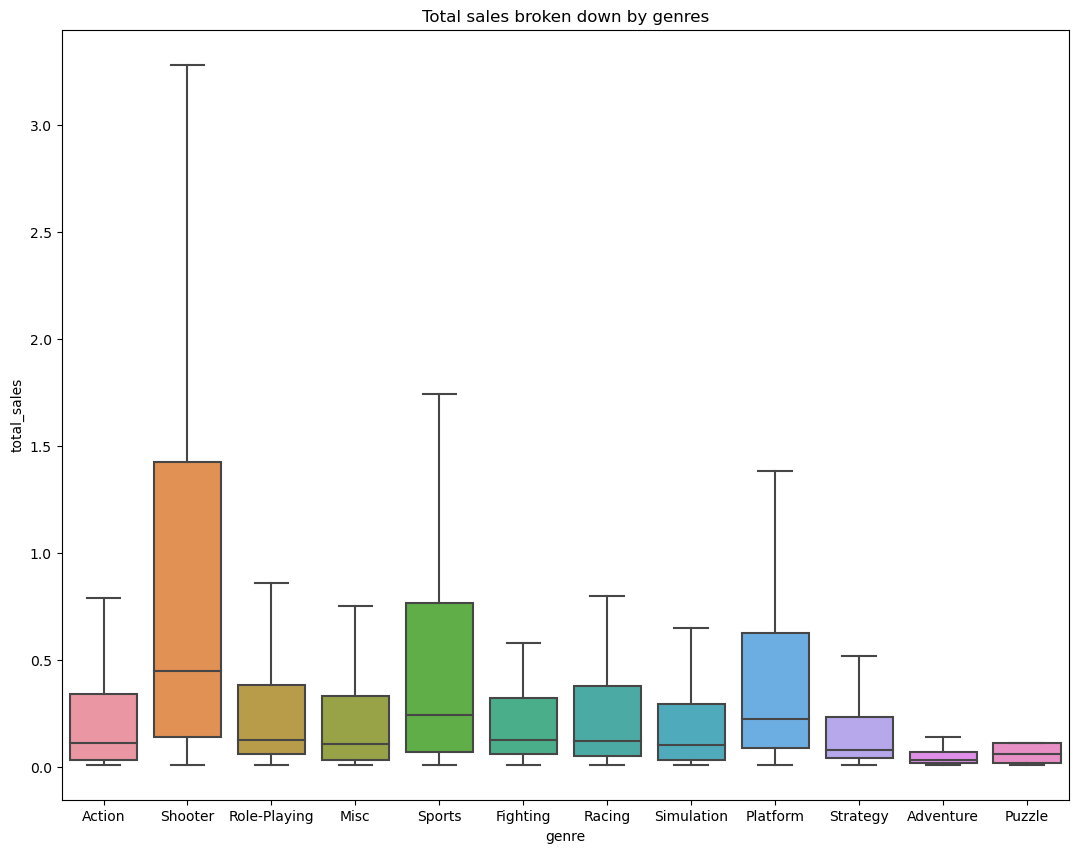

In [63]:
plt.figure(figsize=(13,10))
plt.title='Destribution of sales by genres'
sns.boxplot(x='genre',y='total_sales',data=forecast_data,showfliers = False).set_title("Total sales broken down by genres");

Let's have a look at TOP 5 platforms in NA, EU and Japan.

In [64]:
na=forecast_data.groupby('platform')['na_sales'].sum().sort_values(ascending=False).reset_index().head()
na

,platform,na_sales
0,PS4,108.74
1,XOne,93.12
2,X360,81.66
3,PS3,63.50
4,3DS,38.20


In [65]:
eu=forecast_data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).reset_index().head()
eu

,platform,eu_sales
0,PS4,141.09
1,PS3,67.81
2,XOne,51.59
3,X360,42.52
4,3DS,30.96


In [66]:
jp=forecast_data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).reset_index().head()
jp

,platform,jp_sales
0,3DS,67.81
1,PS3,23.35
2,PSV,18.59
3,PS4,15.96
4,WiiU,10.88


In [67]:
all_rev=forecast_data.groupby(['platform'])['na_sales','jp_sales','eu_sales'].sum().reset_index()
all_rev

C:\Users\asiar\AppData\Local\Temp\ipykernel_24776\3779811933.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  all_rev=forecast_data.groupby(['platform'])['na_sales','jp_sales','eu_sales'].sum().reset_index()


,platform,na_sales,jp_sales,eu_sales
0,3DS,38.20,67.81,30.96
1,DS,0.57,0.00,0.85
2,PC,11.19,0.00,25.84
3,PS3,63.50,23.35,67.81
4,PS4,108.74,15.96,141.09
5,PSP,0.00,3.53,0.17
6,PSV,5.04,18.59,6.10
7,Wii,6.56,0.05,5.93
8,WiiU,29.21,10.88,19.85
9,X360,81.66,0.51,42.52


The most popular platforms in NA are: X360, PS2, Wii, PS3 and DS. 

Top 5 in EU are PS2, PS3, X360, Wii and PS.

Top 5 in Japan are DS, PS, PS2, SNES and 3DS.

As we see, the most popular platforms in NA and EU are almost the same. But the only platform that is in the top 5 in each region is PS2.

Let's calculate the percentage of sales in all regions. 

In [68]:
all_rev['na_sales%']=all_rev['na_sales']/all_rev['na_sales'].sum()
all_rev['jp_sales%']=all_rev['jp_sales']/all_rev['jp_sales'].sum()
all_rev['eu_sales%']=all_rev['eu_sales']/all_rev['eu_sales'].sum()
all_rev.sort_values(by='na_sales',ascending=False)

,platform,na_sales,jp_sales,eu_sales,na_sales%,jp_sales%,eu_sales%
4,PS4,108.74,15.96,141.09,0.248384,0.113175,0.359273
10,XOne,93.12,0.34,51.59,0.212705,0.002411,0.131369
9,X360,81.66,0.51,42.52,0.186528,0.003617,0.108273
3,PS3,63.50,23.35,67.81,0.145047,0.165579,0.172672
0,3DS,38.20,67.81,30.96,0.087256,0.480854,0.078837
8,WiiU,29.21,10.88,19.85,0.066721,0.077152,0.050546
2,PC,11.19,0.00,25.84,0.025560,0.000000,0.065799
7,Wii,6.56,0.05,5.93,0.014984,0.000355,0.015100
6,PSV,5.04,18.59,6.10,0.011512,0.131825,0.015533
1,DS,0.57,0.00,0.85,0.001302,0.000000,0.002164


   Platforms X360 and Wii have 10-13% share in NA and EU markets but almost nothing in Japan. Meanwhile platform PS2 also has 11-13% in all 3 regions. Platforms PS3 has bigger market share in EU and NA, while platforms DS and PS are more popular in Japan.

Let's make a vizualization of TOP 5 games in all regions.

In [69]:
top5_na=all_rev.sort_values(by='na_sales', ascending=False).head()
top5_eu=all_rev.sort_values(by='eu_sales', ascending=False).head()
top5_jp=all_rev.sort_values(by='jp_sales', ascending=False).head()

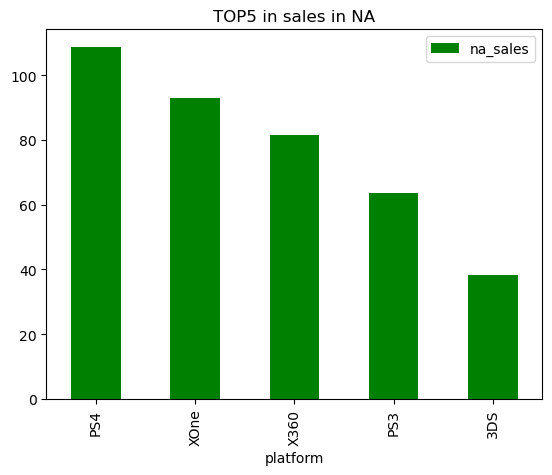

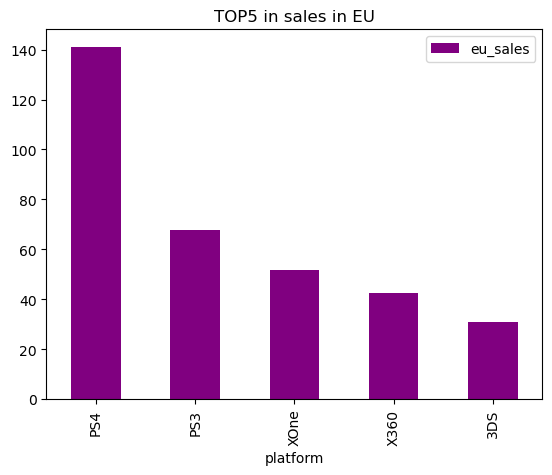

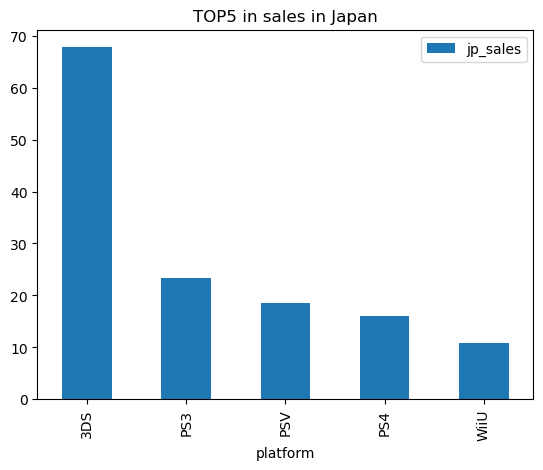

In [90]:
top5_na.plot(x='platform', y='na_sales', kind='bar', color='green').set_title("TOP5 in sales in NA");
top5_eu.plot(x='platform', y='eu_sales', kind='bar', color='purple').set_title("TOP5 in sales in EU");
top5_jp.plot(x='platform', y='jp_sales', kind='bar').set_title("TOP5 in sales in Japan");

Let's check the most popular genres in different regions.

In [72]:
na_genre=forecast_data.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head()
na_genre

genre
Action          126.13
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
Name: na_sales, dtype: float64

In [73]:
eu_genre=forecast_data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head()
eu_genre

genre
Action          118.61
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
Name: eu_sales, dtype: float64

In [74]:
jp_genre=forecast_data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head()
jp_genre

genre
Role-Playing    51.04
Action          40.49
Misc             9.44
Fighting         7.65
Shooter          6.61
Name: jp_sales, dtype: float64

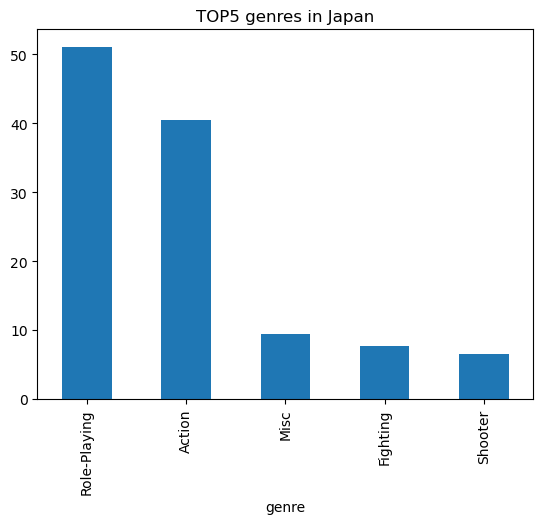

In [94]:
jp_genre.plot(kind='bar').set_title("TOP5 genres in Japan");


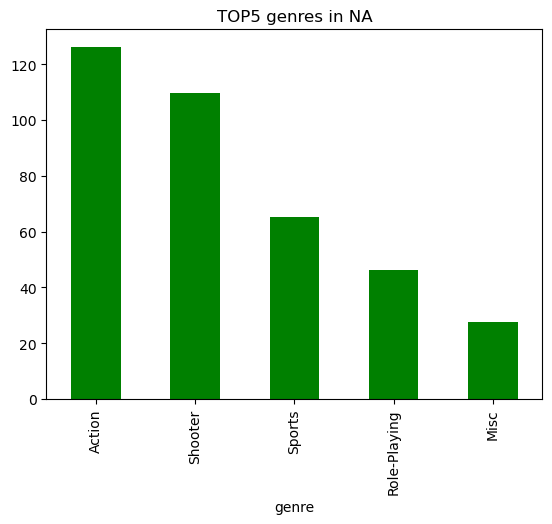

In [92]:
na_genre.plot(kind='bar', color='green').set_title("TOP5 genres in NA");

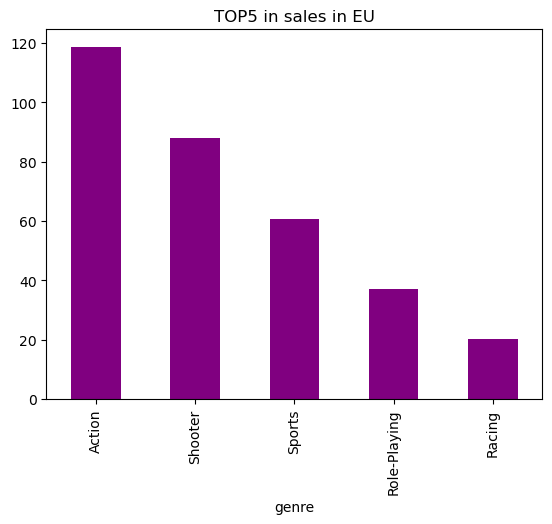

In [93]:
eu_genre.plot(kind='bar', color='purple').set_title("TOP5 genres in EU");

The most popular genres in NA in EA are action,sports and shooter. In Japan the genre that brings the most amount of money is role-playing, action and sports occupy 2nd and 3rd places.

Let's study ratings in different regions.

In [78]:
all_rat=forecast_data.groupby(['rating'])['na_sales','jp_sales','eu_sales'].sum().reset_index()
all_rat

,rating,na_sales,jp_sales,eu_sales
0,E,79.05,15.14,83.36
1,E10+,54.24,5.89,42.69
2,M,165.29,14.11,145.80
3,T,49.79,20.59,41.95
4,unknown,89.42,85.29,78.91


In [79]:
all_rat['na_sales%']=all_rat['na_sales']/all_rat['na_sales'].sum()
all_rat['jp_sales%']=all_rat['jp_sales']/all_rat['jp_sales'].sum()
all_rat['eu_sales%']=all_rat['eu_sales']/all_rat['eu_sales'].sum()
all_rat.sort_values(by='na_sales',ascending=False)

,rating,na_sales,jp_sales,eu_sales,na_sales%,jp_sales%,eu_sales%
2,M,165.29,14.11,145.80,0.377555,0.100057,0.371266
4,unknown,89.42,85.29,78.91,0.204253,0.604808,0.200937
0,E,79.05,15.14,83.36,0.180566,0.107361,0.212269
1,E10+,54.24,5.89,42.69,0.123895,0.041767,0.108706
3,T,49.79,20.59,41.95,0.113730,0.146008,0.106822


The biggest sales have games for Matures 17+(rating M) and everyone (rating E) in all regions. Games with rating RP,AO and EC have the lowest market share everywhere.

## Test following hypotheses

#### Hypothes 1
Our null hypothesis will be: Average user ratings of the XOne and PC platforms are the same.

Alternative hypothesis: Average user ratings of the XOne and PC platforms are different.

We have two independet samples: user ratings of the XOne and user ratings of the PC platforms. So we need st.ttest_ind() to compare them. Let's take alpha = 0,05. 

According to our data, the p-value is higher than alpha, we have to accept the null hypothesis, the average user ratings of the XOne and PC platforms are the same

In [80]:
pc=forecast_data[(forecast_data.platform=='PC')&(forecast_data.user_score.notna())&(df.user_score!='tbd')]['user_score'].astype(float)

In [81]:
xone=forecast_data[(forecast_data.platform=='XOne')&(forecast_data.user_score.notna())&(df.user_score!='tbd')]['user_score'].astype(float)

<div class="alert alert-block alert-success"> <b>Reviewer's comment v3</b> <a 
class="tocSkip"></a>
Correct

In [83]:
from scipy import stats
stats.ttest_ind(xone, pc,equal_var=False, nan_policy='omit' )

Ttest_indResult(statistic=1.4027031463010626, pvalue=0.16174359801784316)

  According to our data, the p-value is higher than alpha, we have to accept the null hypothesis, the average user ratings of the XOne and PC platforms are the same.

#### Hypothes 2
Our null hypothesis will be: Average user ratings for the Action and Sports genres are the same.

Alternative hypothesis: Average user ratings for the Action and Sports genres are different.

We have two independet samples: user ratings of the Action and user ratings of the Sports genres. So we need st.ttest_ind() to compare them. Let's take alpha = 0,05. 

According to our data, we can accept the null hypothesis, so average user ratings for the Action and Sports genres are the same.

In [84]:
action=forecast_data[(forecast_data.genre=='Action')&(forecast_data.user_score.notna())&(forecast_data.user_score!='tbd')]['user_score'].astype(float)

In [85]:
sports=forecast_data[(forecast_data.genre=='Sports')&(forecast_data.user_score.notna())&(forecast_data.user_score!='tbd')]['user_score'].astype(float)

In [86]:
stats.ttest_ind(action, sports,equal_var=False, nan_policy='omit' )

Ttest_indResult(statistic=10.242085476872317, pvalue=1.3883444596405356e-20)

According to our data, we can accept the null hypothesis, so average user ratings for the Action and Sports genres are the same.

## General conclusion

   We had the data with information about games, platforms, years of release, genres, sales in different regions, critic and user scores and rating. There were some problems with our data that we had to fix. We changed to lower case column names, we had missing values in columns 'Name', 'Genre', 'Year_of_Release', 'Critic_Score', 'User_Score', 'Rating'. Missing values in column 'Name', 'Genre' we dropped, in column 'Year_of_Release' we changed part of Nans with most popular values, columns 'Critic_Score', 'User_Score', 'Rating' we left as they were. There were inappropriate data types in columns 'Year_of_Release' and 'User_Score', but we can't change it because there were missing values there. We changed the data type in column 'User_Score' when we dropped Nans due to our needs.
   
   We calculated the total sales (the sum of sales in all regions) for each game and found that the platforms with the greatest total sales for all periods of time were PS2, X360 and PS3.
    
   Our next step was to investigate the distribution of years when games were released and payed attention to the fate of the most popular ones. The first game was released in 1980 and we have data till 20016. The biggest amount of games were released between 2002 and 2011. But for our analysis we took data from 2012 till 2016. We found that a lot of platforms that used to be popular don't produce games now (WS,XB,PS,N64,PS2,GBA,GB,DC,GC,DS,PSP). And average lifetime of a platform  is 7,5.
   
   According to our data, PS4, PS3, X360 platforms are leading in sales during 2012-2016. However only 2 platforms are growing: PS4 and Xone. We can call them potentially profitable platforms. There are 2 platforms that are shrinking: PS3 and X360. All other platforms are more or less stable.
   
   Drawing a box plot for the global sales of all games, broken down by platform, helped us to understand that the biggest average sales had platform X360, but other platforms from the top 10 platforms are very close to each other.
   
   User and professional reviews didn't affect the sales for two popular platforms - PS4 and X360. Building scatter plots and calculating the correlations proved that. 
   
   The biggest amount of games in our data are action, sports and misk. The highest sales have action, sports and shooter. Misk occupied 5th place in total sales. The most unpopular genres with lowest sales are puzzles and strategy.
   
   We found that the most popular platforms in NA are X360, PS2, Wii, PS3 and DS. Top 5 in EU are PS2, PS3, X360, Wii and PS.
Top 5 in Japan are DS, PS, PS2, SNES and 3DS. We cocluded that the most popular platforms in NA and EU are almost the same. But the only platform that is in the top 5 in each region is PS2.
    Platforms X360 and Wii have 10-13% share in NA and EU markets but almost nothing in Japan. Meanwhile platform PS2 also has 11-13% in all 3 regions. Platforms PS3 has bigger market share in EU and NA, while platforms DS and PS are more popular in Japan. 
    The most popular genres in NA in EA are action,sports and shooter. In Japan the genre that brings the most amount of money is role-playing, action and sports occupy 2nd and 3rd places.
    The biggest sales have games for Matures 17+(rating M) and everyone (rating E) in all regions. Games with rating RP,AO and EC have the lowest market share everywhere.
    We tested hypotheses and the results of testing show us that:
1. Average user ratings of the XOne and PC platforms are the same
2. Average user ratings for the Action and Sports genres are the same.